In [1]:
# importing all the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LassoCV, Ridge,RidgeCV, ElasticNet,ElasticNetCV,Lasso
import pickle
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Load the dataset
df = pd.read_csv("happiness_data.csv",sep=",",encoding="UTF-8")

#showing first 5 rows
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


<H1>A] Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical? </H1>

In [3]:
# summarize data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [4]:
print(df.describe())
print("*"*100)
print(df.shape)
print("*"*100)


              year  Life Ladder  Log GDP per capita  Social support  \
count  1949.000000  1949.000000         1913.000000     1936.000000   
mean   2013.216008     5.466705            9.368453        0.812552   
std       4.166828     1.115711            1.154084        0.118482   
min    2005.000000     2.375000            6.635000        0.290000   
25%    2010.000000     4.640000            8.464000        0.749750   
50%    2013.000000     5.386000            9.460000        0.835500   
75%    2017.000000     6.283000           10.353000        0.905000   
max    2020.000000     8.019000           11.648000        0.987000   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       1894.000000                   1917.000000   
mean                          63.359374                      0.742558   
std                            7.510245                      0.142093   
min                           32.300000                      0.25800

<H1>Ans - A</H1>
<H3>
- Total 1949 rows & 10 attributes are presented but some rows contains "N/A" or "NULL" values<br>
- Only Contry Name is Categorical Data<br>
- 'year', Life Ladder', 'Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect are continues data</H3>

<H1>B] Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?</H1>

In [5]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'Life Ladder'}>,
        <Axes: title={'center': 'Log GDP per capita'}>],
       [<Axes: title={'center': 'Social support'}>,
        <Axes: title={'center': 'Healthy life expectancy at birth'}>,
        <Axes: title={'center': 'Freedom to make life choices'}>],
       [<Axes: title={'center': 'Generosity'}>,
        <Axes: title={'center': 'Perceptions of corruption'}>,
        <Axes: title={'center': 'Positive affect'}>],
       [<Axes: title={'center': 'Negative affect'}>, <Axes: >, <Axes: >]],
      dtype=object)

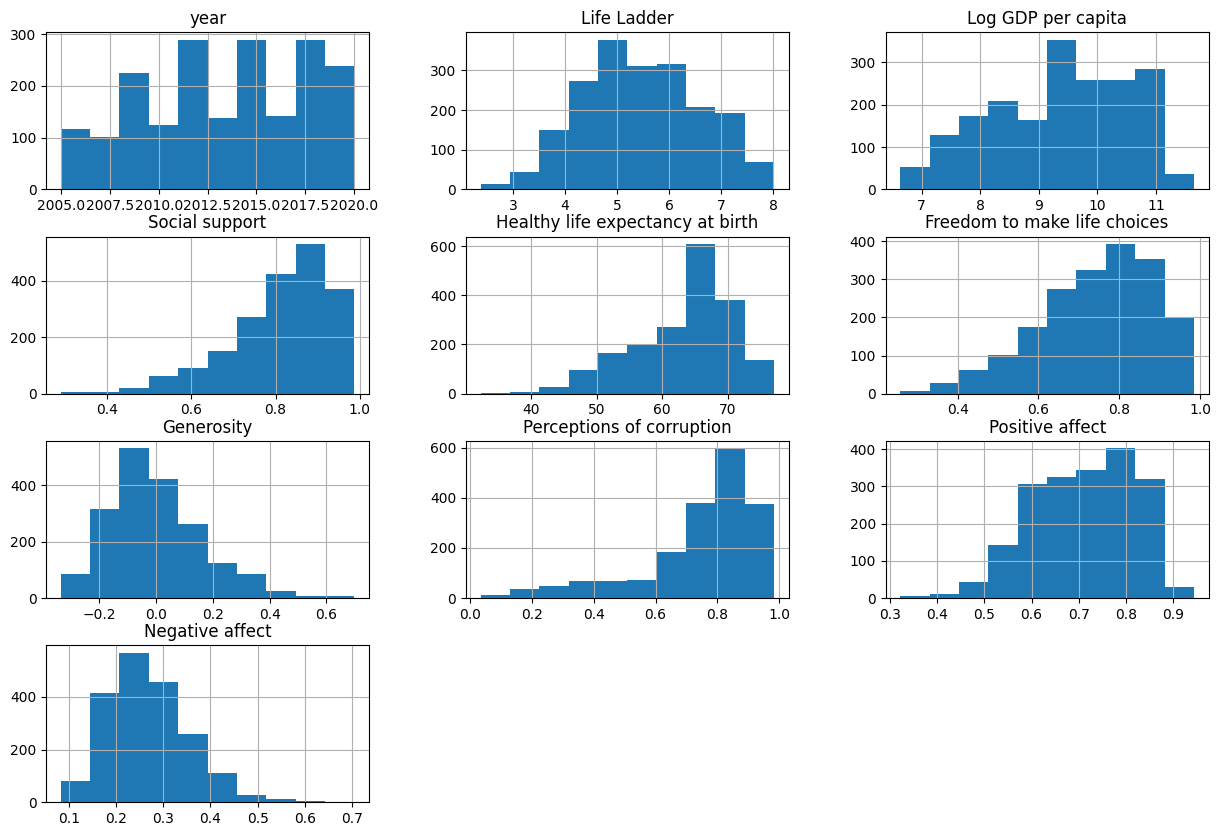

In [6]:
# plotting histogram
%matplotlib inline

df.hist(figsize=(15,10))

In [7]:
df.isna().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [8]:
# Removing the year column from dataframe
df.drop(columns='year',inplace=True)

#Replacing the NAs with Median Values
df['Log GDP per capita'].fillna(df['Log GDP per capita'].median(),inplace=True)
df['Social support'].fillna(df['Social support'].median(),inplace=True)
df['Healthy life expectancy at birth'].fillna(df['Healthy life expectancy at birth'].median(),inplace=True)
df['Freedom to make life choices'].fillna(df['Freedom to make life choices'].median(),inplace=True)
df['Generosity'].fillna(df['Generosity'].median(),inplace=True)
df['Perceptions of corruption'].fillna(df['Perceptions of corruption'].median(),inplace=True)
df['Positive affect'].fillna(df['Positive affect'].median(),inplace=True)
df['Negative affect'].fillna(df['Negative affect'].median(),inplace=True)

df.info()
print("*"*100)
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   Life Ladder                       1949 non-null   float64
 2   Log GDP per capita                1949 non-null   float64
 3   Social support                    1949 non-null   float64
 4   Healthy life expectancy at birth  1949 non-null   float64
 5   Freedom to make life choices      1949 non-null   float64
 6   Generosity                        1949 non-null   float64
 7   Perceptions of corruption         1949 non-null   float64
 8   Positive affect                   1949 non-null   float64
 9   Negative affect                   1949 non-null   float64
dtypes: float64(9), object(1)
memory usage: 152.4+ KB
***********************************************************************************

Country name                        0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

<H1>Ans - B</H1>
<H3>
- We have dropped the year column from dataframe<br>
- All the attributes with N/A values are special and beeing treated to fill the N/A values, with the median value to avoid the outliers effect<br>
- The N/A's present in the dataset have been cleaned up.</H3>

<H1>C] Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.</H1>

In [9]:
#Dropping the Country Name Attribute to remove Categorical Values
df = df.drop(columns=['Country name'])
df.corr(method="pearson")

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Life Ladder,1.000000,0.783257,0.705978,0.741064,0.525681,0.184202,-0.415288,0.530343,-0.296623
Log GDP per capita,0.783257,1.000000,0.682784,0.835302,0.360628,-0.003829,-0.326454,0.296822,-0.204294
Social support,0.705978,0.682784,1.000000,0.614223,0.409026,0.064236,-0.212068,0.430470,-0.395725
Healthy life expectancy at birth,0.741064,0.835302,0.614223,1.000000,0.381355,0.021098,-0.308823,0.313161,-0.139256
Freedom to make life choices,0.525681,0.360628,0.409026,0.381355,1.000000,0.318427,-0.469266,0.603294,-0.265139
Generosity,0.184202,-0.003829,0.064236,0.021098,0.318427,1.000000,-0.277798,0.348891,-0.089167
Perceptions of corruption,-0.415288,-0.326454,-0.212068,-0.308823,-0.469266,-0.277798,1.000000,-0.288331,0.255564
Positive affect,0.530343,0.296822,0.430470,0.313161,0.603294,0.348891,-0.288331,1.000000,-0.372698
Negative affect,-0.296623,-0.204294,-0.395725,-0.139256,-0.265139,-0.089167,0.255564,-0.372698,1.000000


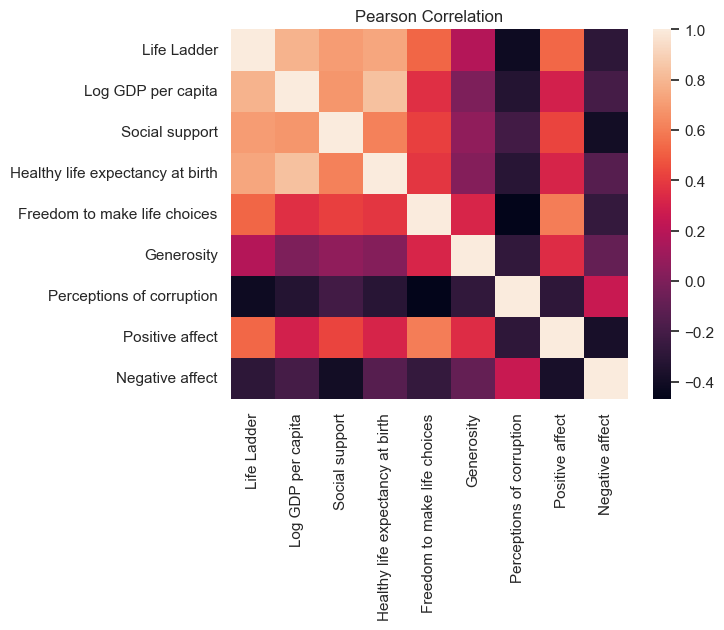

In [10]:
import seaborn as sns

#Making a Heatmap to determine Correlation
sns.set_theme(style="white")
ax = sns.heatmap(df.corr()).set_title("Pearson Correlation")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


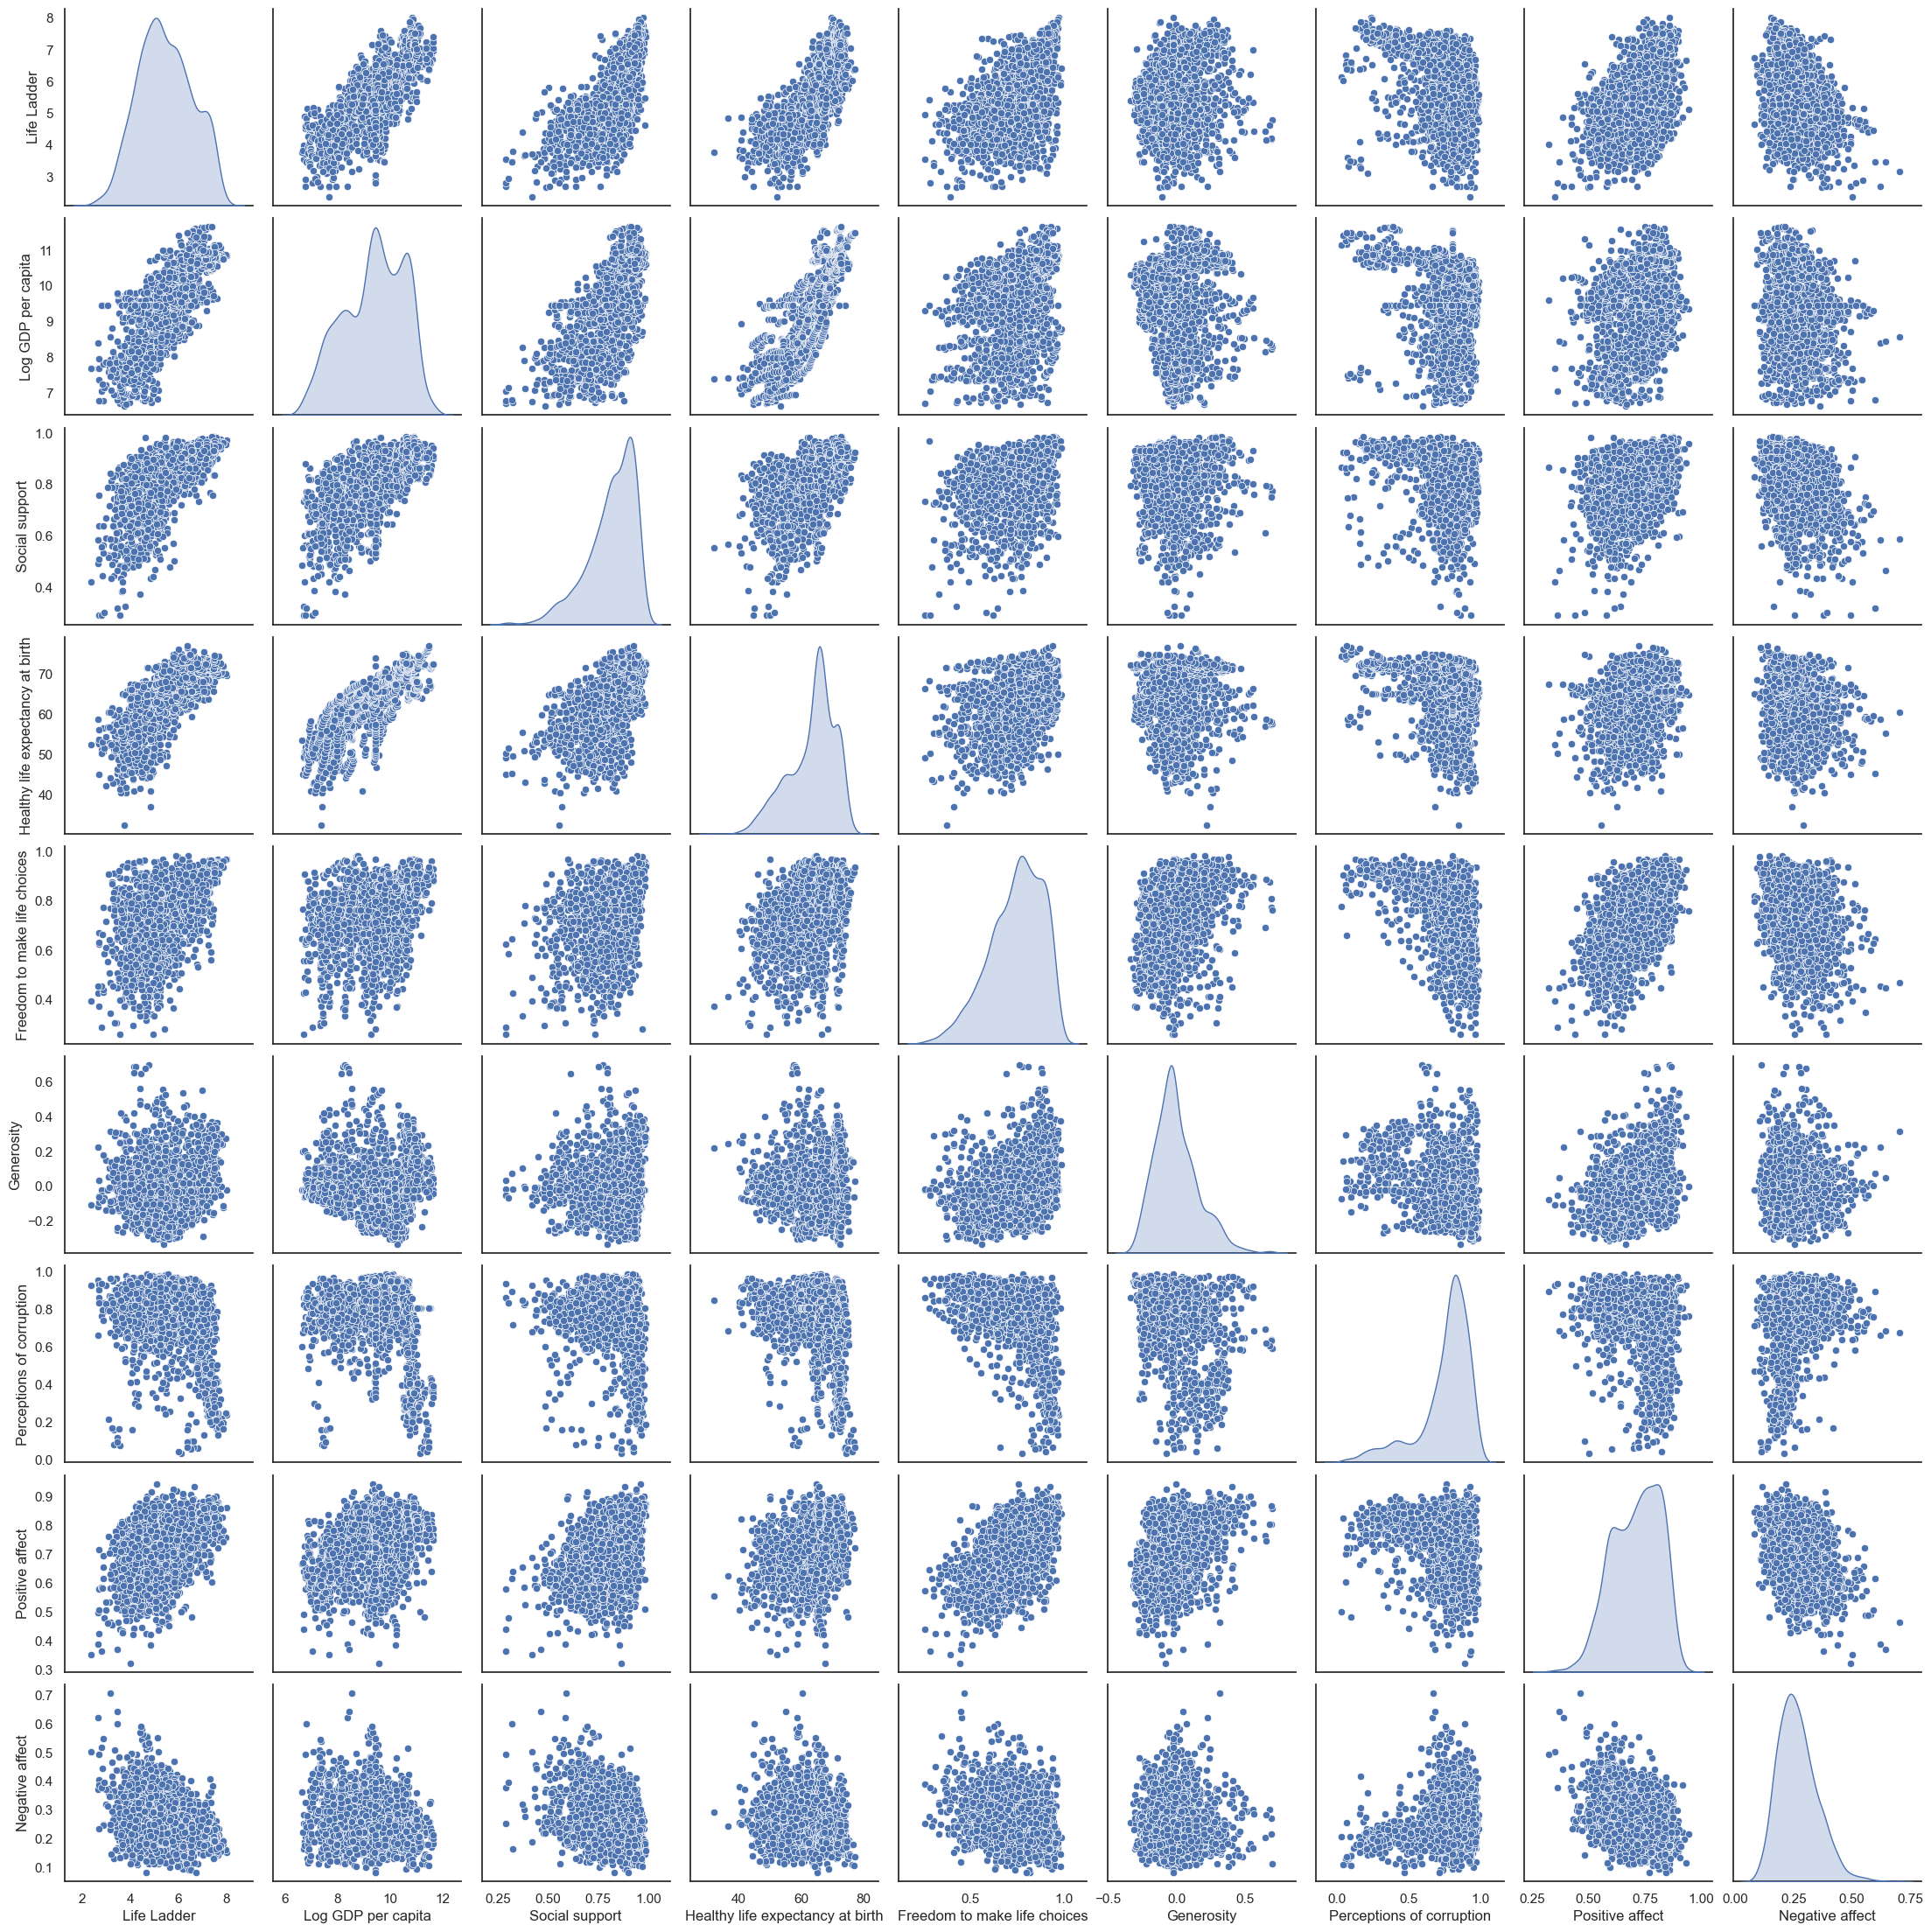

In [11]:
#Plotting Scatter Plots
sns.pairplot(df, diag_kind="kde")

<H1> Ans - C</H1>
<H3>From the plotted scatter plot we can see that Life Ladder has high co-relation with [Log GDP per capita], [Social support], [Healthy life expectancy at birth] 
and all these logically make sense as these are the important factors that contribute to prosperity of nation and thus happiness.</H3>

<H1>D] Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.</H1>

In [12]:
df.corr(method="pearson")['Life Ladder']

Life Ladder                         1.000000
Log GDP per capita                  0.783257
Social support                      0.705978
Healthy life expectancy at birth    0.741064
Freedom to make life choices        0.525681
Generosity                          0.184202
Perceptions of corruption          -0.415288
Positive affect                     0.530343
Negative affect                    -0.296623
Name: Life Ladder, dtype: float64

In [13]:
#X = df.drop(columns=['Life Ladder'])
#Y = df['Life Ladder']
#Selecting only the columns that have correlation > 0.5
X = df.drop(columns=['Life Ladder', 'Negative affect', 'Generosity', 'Perceptions of corruption'])
Y = df['Life Ladder']
# Dividing data into train and test (20% data for test)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=100)

X.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Positive affect
0,7.370,0.451,50.80,0.718,0.518
1,7.540,0.552,51.20,0.679,0.584
2,7.647,0.539,51.60,0.600,0.618
3,7.620,0.521,51.92,0.496,0.611
4,7.705,0.521,52.24,0.531,0.710


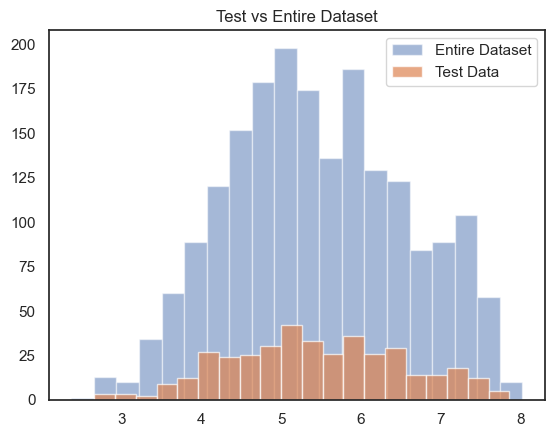

<Figure size 640x480 with 0 Axes>

In [14]:
#Testing if the testing data represents the entire dataset

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Visualize the distribution of Y - the key feature in the entire dataset
plt.hist(Y, bins=20, alpha=0.5, label='Entire Dataset')

# Visualize the distribution of the same feature ('Life Ladder') in the test set
plt.hist(y_test, bins=20, alpha = 0.7, label='Test Data')
plt.title('Test vs Entire Dataset')
plt.legend()
figure(figsize=(8, 6), dpi=80)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

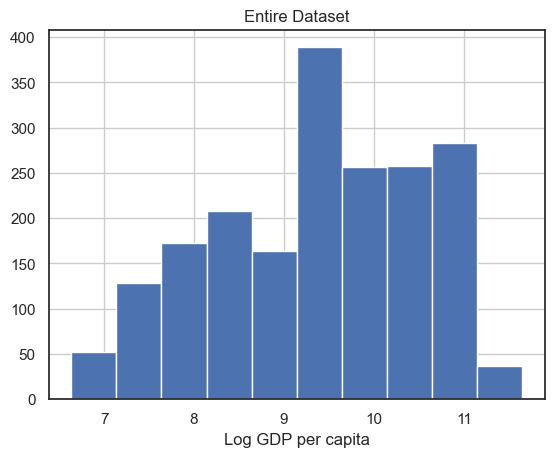

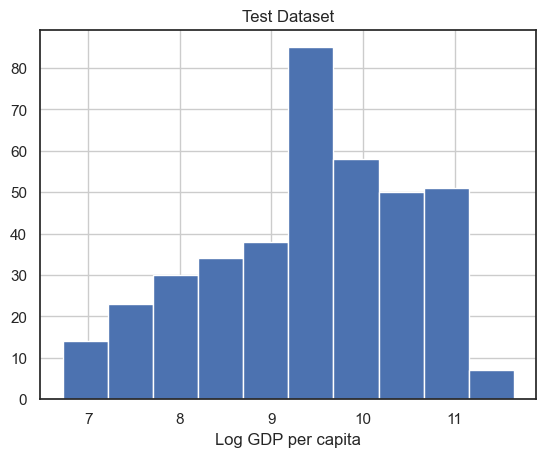

In [15]:
X.hist(column='Log GDP per capita')
plt.title("Entire Dataset")
plt.xlabel('Log GDP per capita')
plt.show

x_test.hist(column='Log GDP per capita')
plt.title("Test Dataset")
plt.xlabel('Log GDP per capita')
plt.show

<H1>Ans - D</H1>
<H3>Through the graph tittled 'Test vs Entire Dataset' we can see that the Test Data is reporesentative of the entire Dataset, as everybin in the Test Data corresponds to a bin in the entire dataset. We have also tested it with a single attribute 'Log GDP per capita' and it can be seen from the above graphs tittled Entire Dataset & Test Dataset that the Test Dataset is representative of the entire dataset. </H3>

<H1>E] Train a Linear Regression model using the training data with four-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration.</H1>

In [16]:
#K-fold Cross Validation for Linear Regression
from sklearn.model_selection import cross_val_score
#4-fold cv 
# create model
model = LinearRegression()
mymodel = model.fit(x_train,y_train)
#evaluation metric is r2
scores = cross_val_score(mymodel, x_train, y_train, scoring='r2', cv=4)
scores
print('R2: %.3f' % np.mean(scores))
#evaluation metric - negative mean squared error
scores1 = -cross_val_score(mymodel, x_train, y_train, scoring='neg_mean_squared_error', cv=4)
scores1
print('MSE: %.3f' % np.mean(scores1))

R2: 0.738
MSE: 0.330


<H1>Linear Regression:</H1>
<H3>
• Linear regression provided a baseline model for regression tasks.<br>
• The model achieved an MSE of 0.33 and an R-squared (R2) score of 0.74 on the training data.</H3>

In [17]:
# Performing Closed Form solution using normal equation

x_closedForm = np.array(X)
y_closedForm = np.array(Y)
x_p = np.c_[np.ones((len(x_closedForm),1)),x_closedForm]

theta = np.linalg.inv(x_p.T.dot(x_p)).dot(x_p.T).dot(y_closedForm)
theta
x_test_1 = np.array([1,9.167,0.880,59.90,0.834,0.859])
#x_test_1 = np.array(x_test.head(1))
#x_test_p = np.c_[np.ones((len(x_test_1),1)),x_test_1]
print(theta)
y_predict = x_test_1.dot(theta)
y_predict


[-3.57969841  0.39129312  1.73077882  0.02811142  0.86669643  2.17826952]


5.808203332535946

In [18]:
# Regresion using SGD
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

#X = df.drop(columns=['Life Ladder', 'Negative affect', 'Generosity', 'Perceptions of corruption'])
X = df.drop(columns=['Life Ladder'])
Y = df['Life Ladder']
# Dividing data into train and test (20% data for test)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=100)

al = [0.1,0.001,0.0001,1,10]
for i in al:
    sgd = SGDRegressor(loss='squared_error',alpha=0.0001, max_iter=1000, tol=1e-3, random_state=42, eta0 = i)
    sgd.fit(x_train, y_train)
    #sgd = SGDRegressor(alpha=best_params['alpha'], penalty=best_params['penalty'], max_iter=best_params['max_iter'], batch_size=32)
    sgd.fit(x_train, y_train)
    y_pred = sgd.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    rmse =np.sqrt(mse)
    print(f"Root Mean Squared Error for alpha = {i}: {rmse}")
    print(f"Mean Squared Error for alpha = {i}: {mse}")
    print("*"*100)

Root Mean Squared Error for alpha = 0.1: 846256254804.6376
Mean Squared Error for alpha = 0.1: 7.161496487959716e+23
****************************************************************************************************
Root Mean Squared Error for alpha = 0.001: 0.664224332002299
Mean Squared Error for alpha = 0.001: 0.4411939632239003
****************************************************************************************************
Root Mean Squared Error for alpha = 0.0001: 0.7264109986853663
Mean Squared Error for alpha = 0.0001: 0.5276729390110713
****************************************************************************************************
Root Mean Squared Error for alpha = 1: 137952155574893.22
Mean Squared Error for alpha = 1: 1.9030797227759542e+28
****************************************************************************************************
Root Mean Squared Error for alpha = 10: 600900994797302.5
Mean Squared Error for alpha = 10: 3.6108200554838774e+29
*********

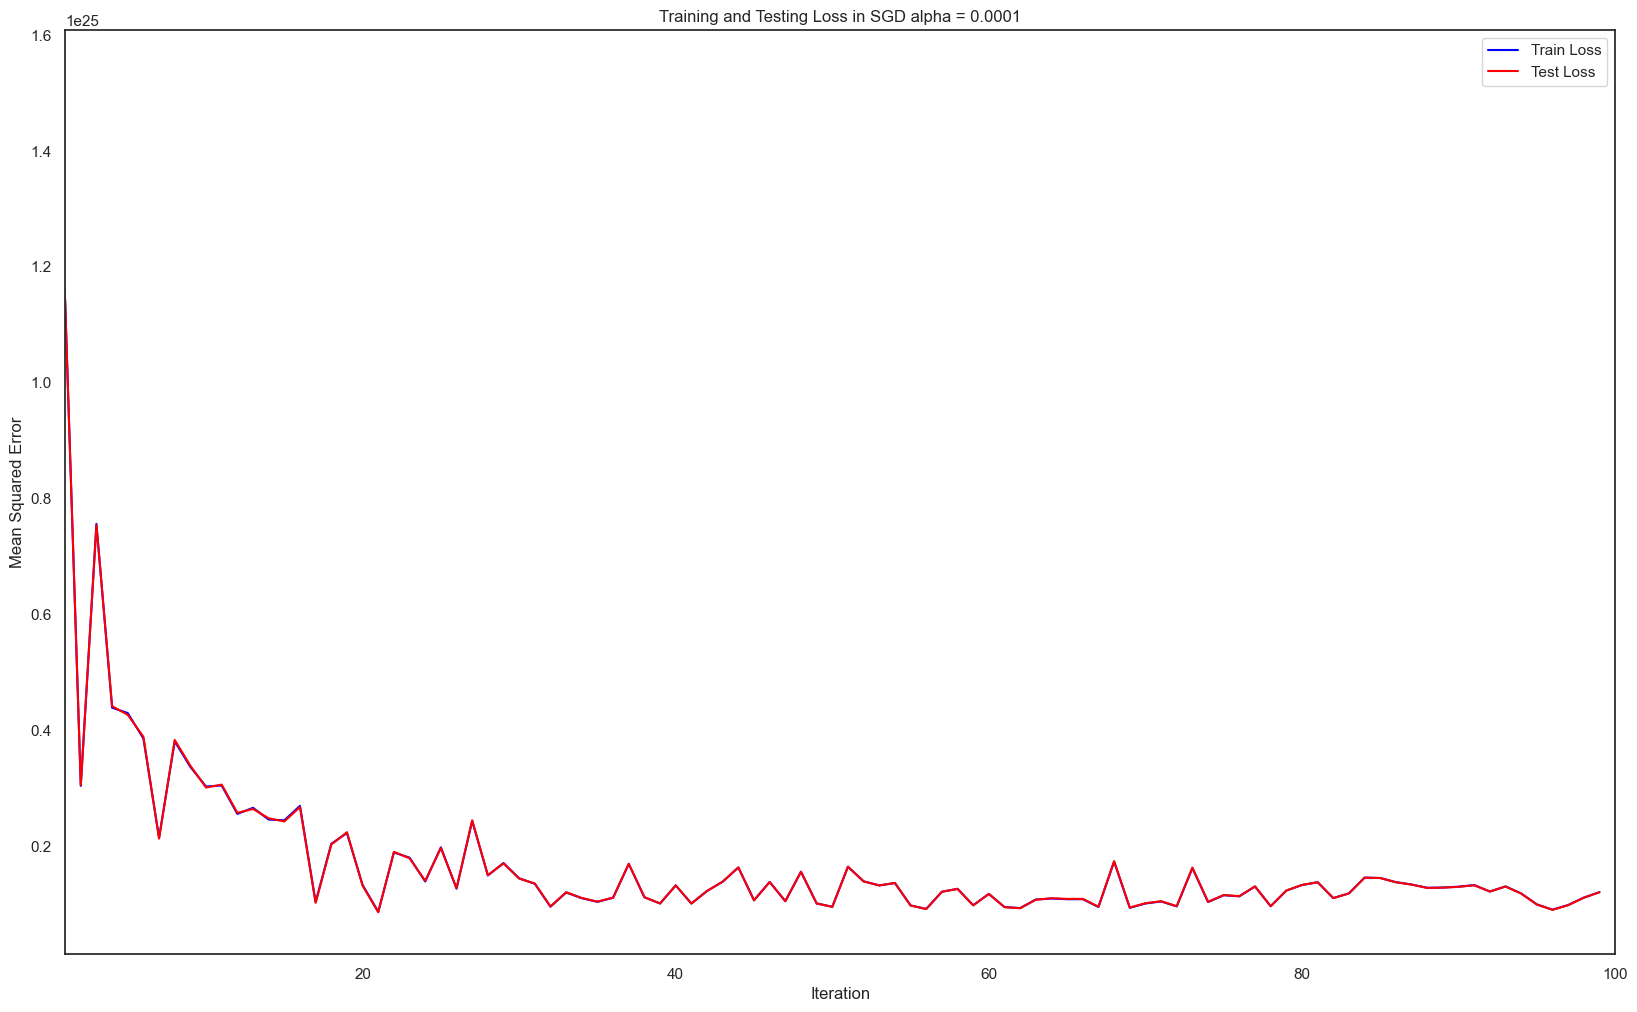

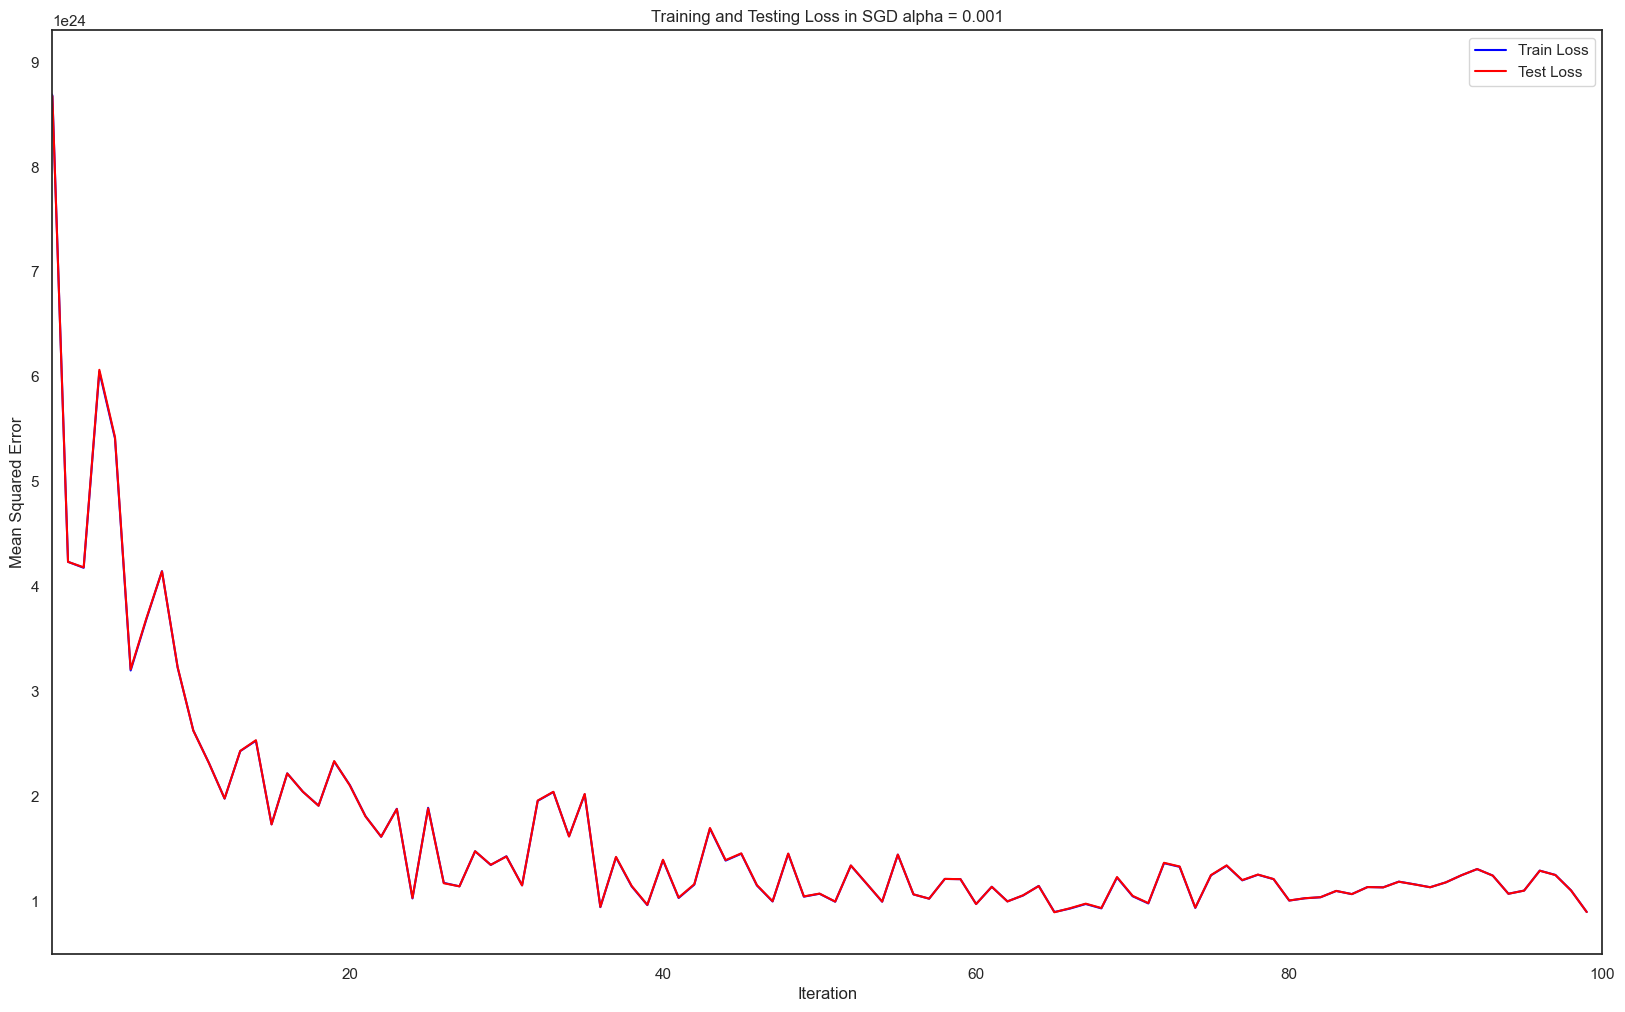

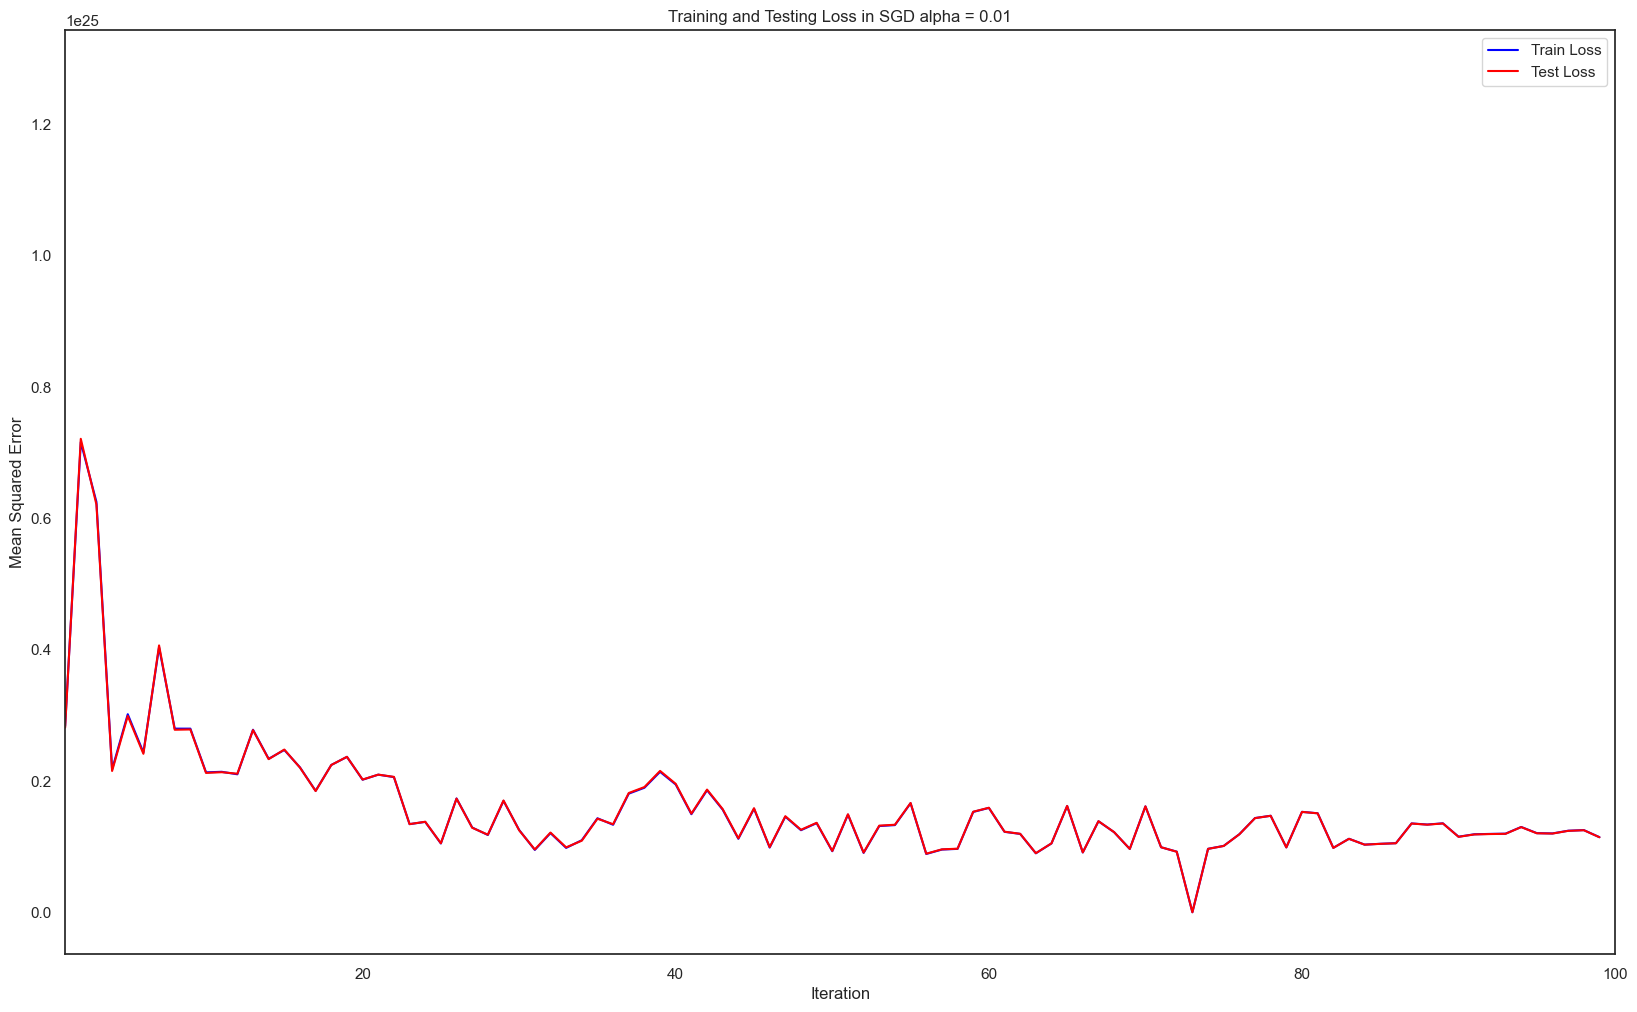

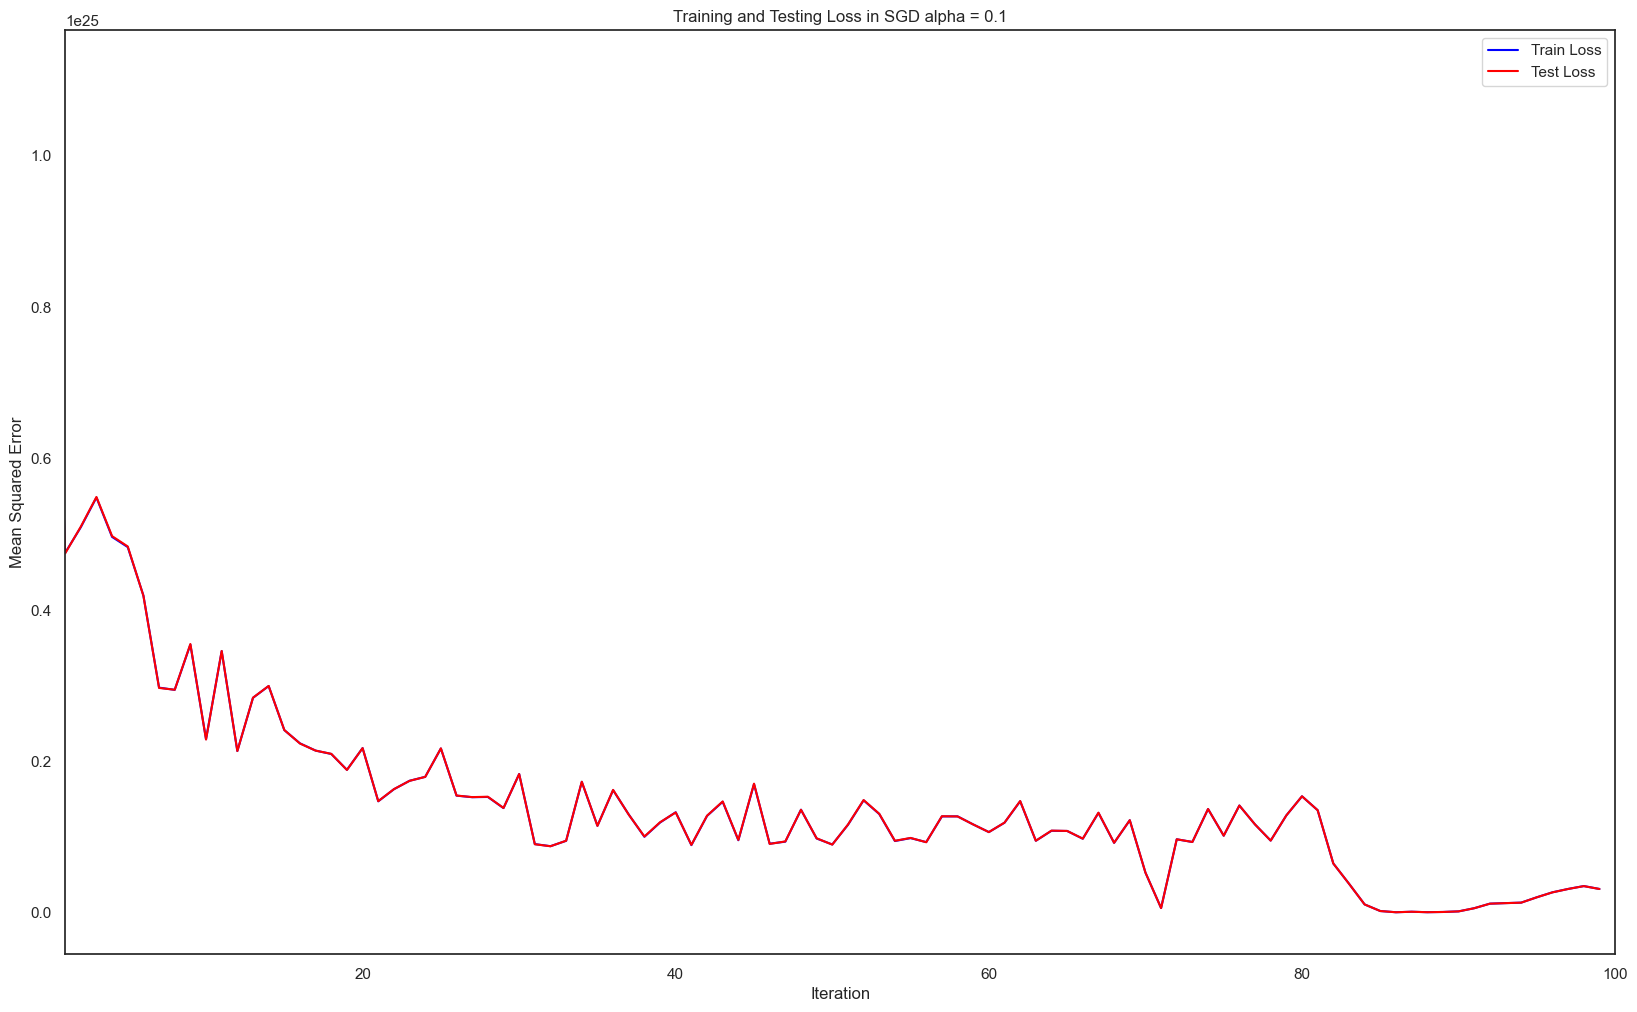

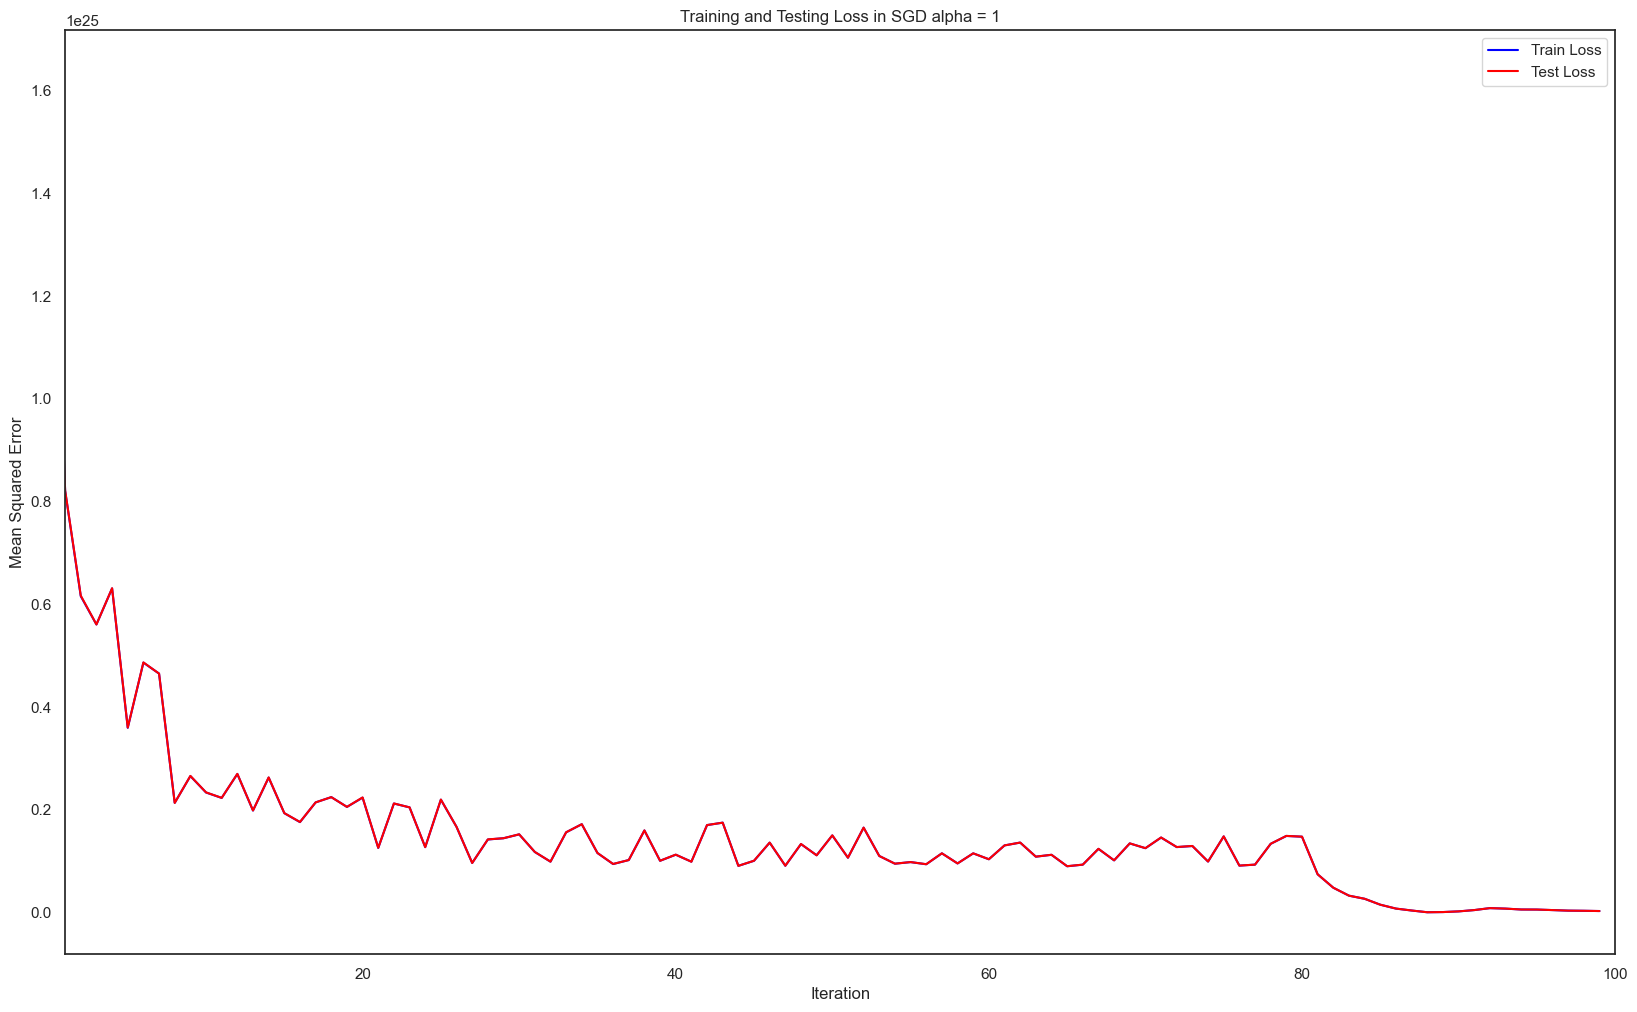

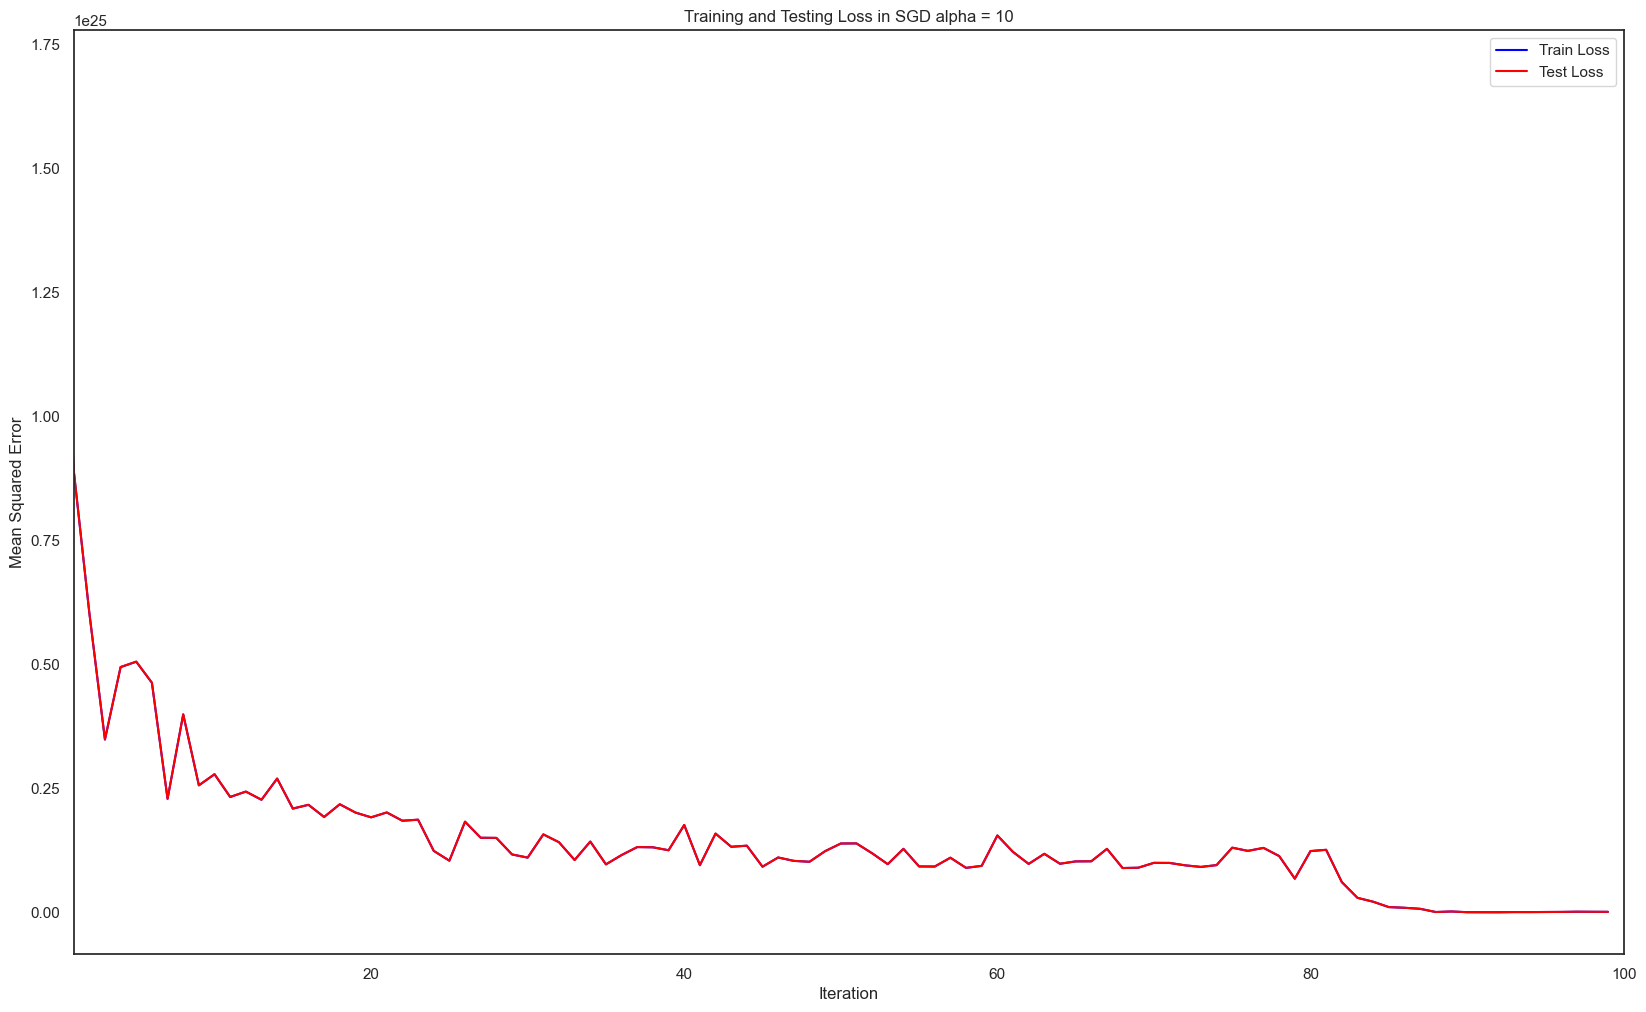

In [19]:
#Plotting the training and validation loss as a function of training iteration -
#Define the SGDRegressor model
#Changing Alpha Values
sgd_al = [0.0001, 0.001, 0.01, 0.1, 1, 10]

for a in sgd_al:
    sgd = SGDRegressor(alpha=a, max_iter=100, random_state=42)

    # Initialize lists to record training and testing loss
    train_losses = []
    test_losses = []

    # Training loop
    for i in range(sgd.max_iter):
        # Fit the model with one iteration of SGD
        sgd.partial_fit(x_train, y_train)
    
        # Calculate training loss
        y_train_pred = sgd.predict(x_train)
        train_loss = mean_squared_error(y_train, y_train_pred)
        train_losses.append(train_loss)
    
        # Calculate testing loss
        y_test_pred = sgd.predict(x_test)
        test_loss = mean_squared_error(y_test, y_test_pred)
        test_losses.append(test_loss)

    # Plot the training and testing loss over iterations
    plt.figure(figsize=(20,12))
    plt.plot(train_losses, label='Train Loss', color='blue')
    plt.plot(test_losses, label='Test Loss', color='red')
    plt.xlim(1,100)
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.title(f'Training and Testing Loss in SGD alpha = {sgd.alpha}')
    plt.show()

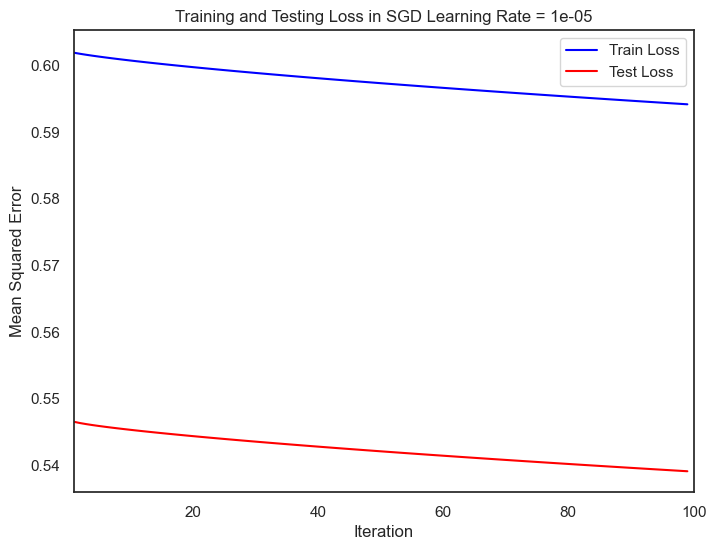

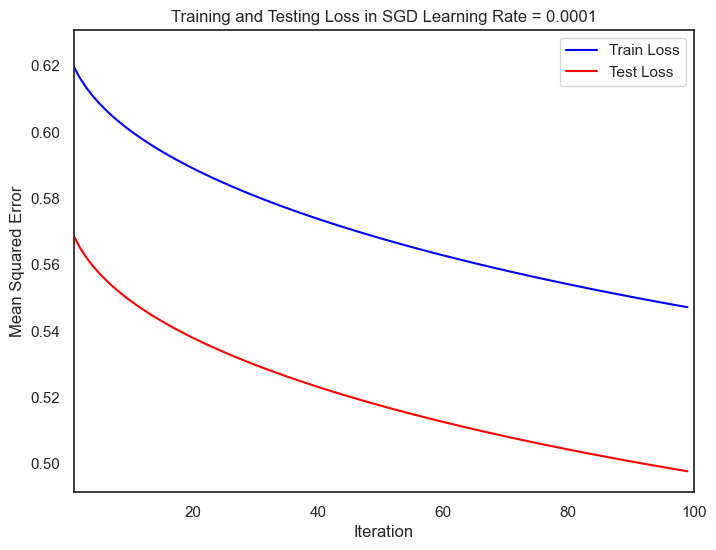

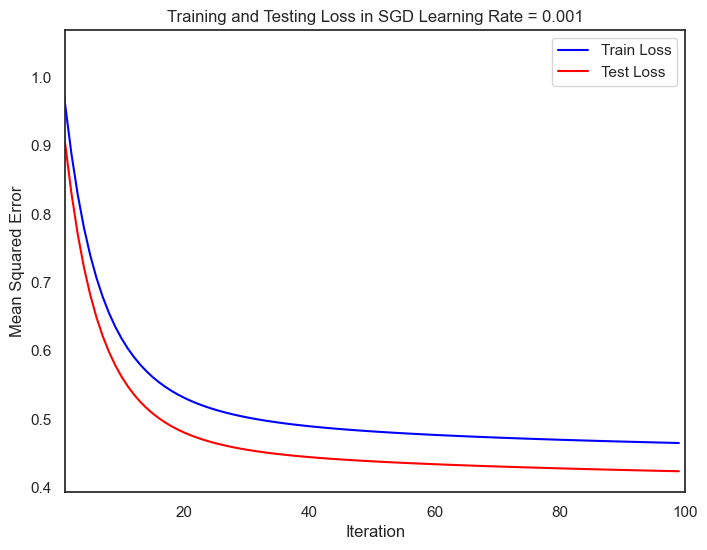

In [20]:
#Plotting the training and validation loss as a function of training iteration -
#Define the SGDRegressor model
#Changing Learning rate
sgd_eta = [0.00001, 0.0001, 0.001]

for a in sgd_eta:
    sgd = SGDRegressor(alpha=0.1, max_iter=100, random_state=42, eta0=a)

    # Initialize lists to record training and testing loss
    train_losses = []
    test_losses = []

    # Training loop
    for i in range(sgd.max_iter):
        # Fit the model with one iteration of SGD
        sgd.partial_fit(x_train, y_train)
    
        # Calculate training loss
        y_train_pred = sgd.predict(x_train)
        train_loss = mean_squared_error(y_train, y_train_pred)
        train_losses.append(train_loss)
    
        # Calculate testing loss
        y_test_pred = sgd.predict(x_test)
        test_loss = mean_squared_error(y_test, y_test_pred)
        test_losses.append(test_loss)

    # Plot the training and testing loss over iterations
    plt.figure(figsize=(8,6))
    plt.plot(train_losses, label='Train Loss', color='blue')
    plt.plot(test_losses, label='Test Loss', color='red')
    plt.xlim(1,100)
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.title(f'Training and Testing Loss in SGD Learning Rate = {sgd.eta0}')
    plt.show()

<H1>SGD Regression</H1>
<H3>
- While changing the alpha values in the SGD regression, the model is well-generalized, it is not over-fitting, or under-fitting.<br>
- But, while changing learning rate in the SGD rergression, the model is not for all learning rates.
- There is supstantial distance between the training and testing, due to which it can be said that the model is underfitting, as majority of the time the training loss is greater than the test loss.</H3>

In [21]:
#Ridge Regression with multiple error values (alpha values), using Cross Validation - 
#Using the linear CV model
from sklearn.linear_model import RidgeCV

#Lasso Cross validation
cv = [0.00001, 0.0001, 0.001,0.01, 0.1, 1, 10]

#Fitting Ridge model for different penalty values
for i in cv:
    print(f"\nRidgeCV Model (alpha = {i})............................................\n")
    ridge_cv = RidgeCV(alphas = [i],cv = 4).fit(x_train, y_train)
    #score
    print("The train score for ridge model is {}".format(ridge_cv.score(x_train, y_train)))
    print("The train score for ridge model is {}".format(ridge_cv.score(x_test, y_test)))


RidgeCV Model (alpha = 1e-05)............................................

The train score for ridge model is 0.7545573110262006
The train score for ridge model is 0.7842923754734236

RidgeCV Model (alpha = 0.0001)............................................

The train score for ridge model is 0.7545573110231115
The train score for ridge model is 0.7842922860762986

RidgeCV Model (alpha = 0.001)............................................

The train score for ridge model is 0.7545573107142748
The train score for ridge model is 0.7842913918701381

RidgeCV Model (alpha = 0.01)............................................

The train score for ridge model is 0.75455727990232
The train score for ridge model is 0.7842824263910098

RidgeCV Model (alpha = 0.1)............................................

The train score for ridge model is 0.7545542688488445
The train score for ridge model is 0.784190501661717

RidgeCV Model (alpha = 1)............................................

The train sco

<H1>Ridge Regression:</H1>
<H3>
- Ridge regression was applied with varying alpha values (penalty terms).<br>
- Higher alpha values (e.g., alpha=10) increased regularization, resulting in a slightly lower test R2 score.<br>
- Ridge regression is effective for preventing overfitting by penalizing large coefficients.</H3>

In [22]:
#Lasso Regression with multiple error values (alpha values), using Cross Validation - 
#Using Lasso Cross validation

cv = [0.00001, 0.0001, 0.001,0.01, 0.1, 1, 10]
#Fitting Lasso model for different penalty values
for i in cv:
    lasso_cv = LassoCV(alphas = [i], random_state=0, cv = 4).fit(x_train, y_train)
    print(f"\nLassoCV Model (alpha = {i})............................................\n")
    #score
    print("The train score for LassoCV model is: ",lasso_cv.score(x_train, y_train))
    print("The test score for LassoCV model is: ", lasso_cv.score(x_test, y_test))


LassoCV Model (alpha = 1e-05)............................................

The train score for LassoCV model is:  0.7545572585737585
The test score for LassoCV model is:  0.7842895939733213

LassoCV Model (alpha = 0.0001)............................................

The train score for LassoCV model is:  0.7545520700409298
The test score for LassoCV model is:  0.7842584222847007

LassoCV Model (alpha = 0.001)............................................

The train score for LassoCV model is:  0.7543964115700572
The test score for LassoCV model is:  0.7837019622287156

LassoCV Model (alpha = 0.01)............................................

The train score for LassoCV model is:  0.7392697417142078
The test score for LassoCV model is:  0.7627506601853513

LassoCV Model (alpha = 0.1)............................................

The train score for LassoCV model is:  0.6206336508505883
The test score for LassoCV model is:  0.6324542934916957

LassoCV Model (alpha = 1).....................

<H1>Lasso Regression:</H1>
<H3>
- Lasso regression was used with different alpha values.<br>
- Higher alpha values (e.g., alpha=10) led to stronger regularization, reducing both training and test scores significantly.<br>
- Lasso regression not only mitigates overfitting but also performs feature selection by driving some coefficients to zero.</H3>

In [23]:
#Elastic Net Regression with multiple error values (alpha values), using Cross Validation - 
#Using Elastic Net Cross Validation

#Lasso Cross validation
cv = [0.0001, 0.001,0.01, 0.1, 1, 10]

#Fitting Elastic Net model for different penalty values
for i in cv:
    model_enet = ElasticNet(alpha = i)
    model_enet.fit(x_train, y_train) 
    train_score = model_enet.score(x_train,y_train)
    test_score = model_enet.score(x_test,y_test)
    #score
    print(f"\nElastic Net Model (alpha ={i})............................................\n")
    print("The train score for elastic net model is {}".format(train_score))
    print("The test score for elastic net model is {}".format(test_score))


Elastic Net Model (alpha =0.0001)............................................

The train score for elastic net model is 0.7545517378514136
The test score for elastic net model is 0.7841953885433925

Elastic Net Model (alpha =0.001)............................................

The train score for elastic net model is 0.7542733397394258
The test score for elastic net model is 0.7830334475057317

Elastic Net Model (alpha =0.01)............................................

The train score for elastic net model is 0.7406577963903482
The test score for elastic net model is 0.7630676204318256

Elastic Net Model (alpha =0.1)............................................

The train score for elastic net model is 0.6282413098742147
The test score for elastic net model is 0.6406136675527292

Elastic Net Model (alpha =1)............................................

The train score for elastic net model is 0.5436095983316771
The test score for elastic net model is 0.5514469914723722

Elastic Net Mod

<H1>Elastic Net Regression:</H1>
<H3>
- Elastic Net regression was employed with different alpha values.<br>
- Higher alpha values (e.g., alpha=10) resulted in lower test R2 scores, indicating stronger regularization.<br>
- Elastic Net combines L1 (Lasso) and L2 (Ridge) penalties, offering a balance between feature selection and coefficient shrinkage.</H3>

<H1>F] Repeat the previous step with polynomial regression. Using validation loss, explore if your model overfits/underfits the data. </H1>

Mean Squared Error: 0.2331637513037584
Root mean Squared value is: 0.4828703255572436
R2 Score: 0.8005120576737166


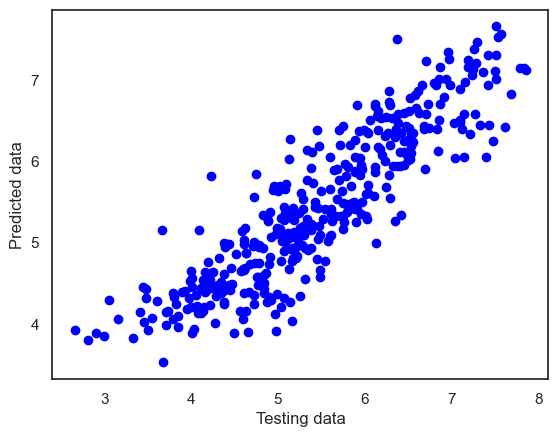

In [24]:
#Polynomial Regression
import math
from sklearn.preprocessing import StandardScaler

df.head()

X = df.drop(columns=['Life Ladder', 'Negative affect', 'Generosity','Perceptions of corruption'])
Y = df['Life Ladder'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 100)

# # Create a StandardScaler object and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X.head()

# # Create polynomial features

poly = PolynomialFeatures(degree = 2, include_bias=False)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)


# # Initialize and train a linear regression model

model = LinearRegression()
model.fit(X_train_poly, y_train)

# # Make predictions on the test data

y_pred = model.predict(X_test_poly)

# # Calculate and print the Mean Squared Error (MSE)

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root mean Squared value is: {math.sqrt(mse)}")

# from sklearn.metrics import r2_score
# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# Print the R2 score
print(f"R2 Score: {r2}")

# Plotting the original data and the polynomial regression curve
plt.scatter(y_test, y_pred, color = 'blue')
plt.xlabel('Testing data')
plt.ylabel('Predicted data')
plt.show()


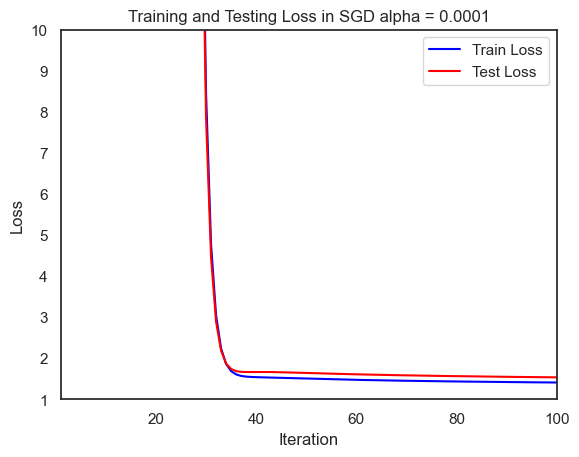

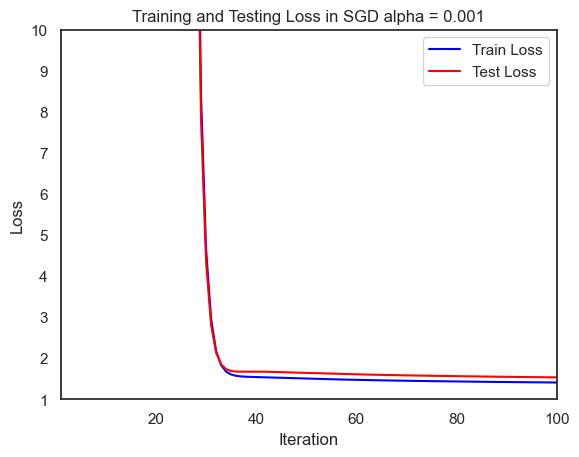

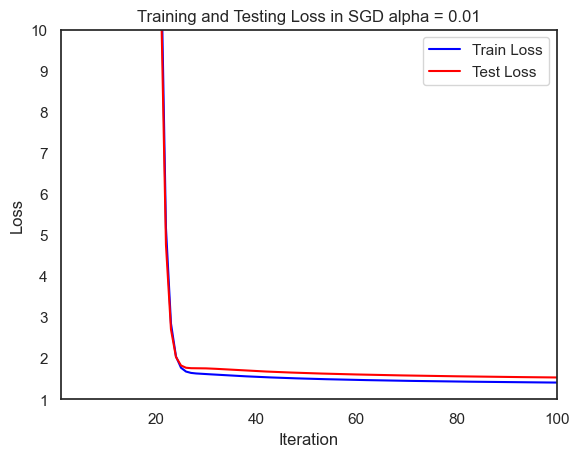

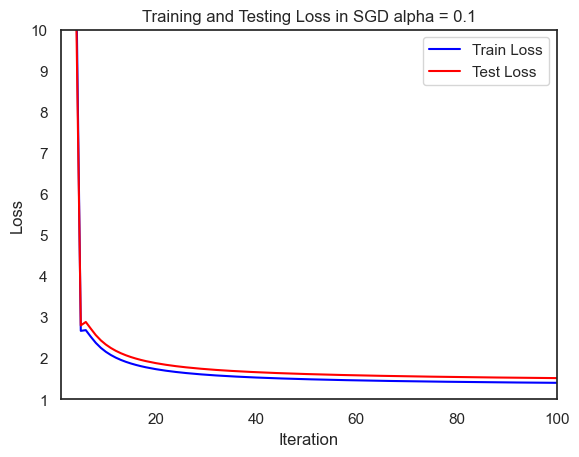

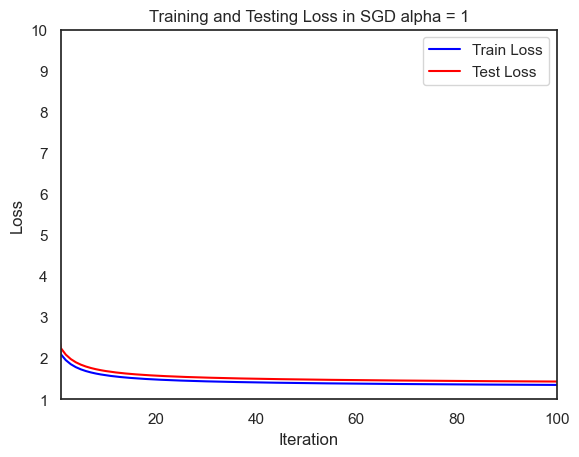

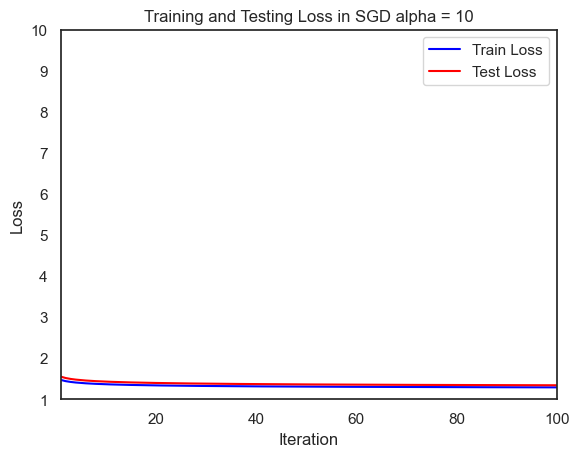

In [25]:
#SGD for Polynomial regression
#Define the SGDRegressor model
#Changing Alpha Values
sgd_al = [0.0001, 0.001, 0.01, 0.1, 1, 10]

X = df.drop(columns=['Life Ladder', 'Negative affect', 'Generosity', 'Perceptions of corruption'])
Y = df['Life Ladder']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

for a in sgd_al:
    # Define the SGDRegressor model
    sgd = SGDRegressor(alpha=a, max_iter=1000, random_state=42, eta0 = 0.1)

    # Initialize lists to record training and testing loss

    train_losses = []
    test_losses = []

    # Training loop
    for i in range(sgd.max_iter):

        # Fit the model with one iteration of SGD
        sgd.partial_fit(X_train_poly, y_train)


        # Calculate training loss
        y_train_pred = sgd.predict(X_train_poly)
        train_loss = mean_squared_error(y_train, y_train_pred)
        train_losses.append(train_loss)

        # Calculate testing loss
        y_test_pred = sgd.predict(X_test_poly)
        test_loss = mean_squared_error(y_test, y_test_pred)
        test_losses.append(test_loss)

    # Plot the training and testing loss over iterations
    plt.plot(train_losses, label='Train Loss', color='blue')
    plt.plot(test_losses, label='Test Loss', color='red')
    plt.xlim(1,100)
    plt.ylim(1,10)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Training and Testing Loss in SGD alpha = {sgd.alpha}')
    plt.show()

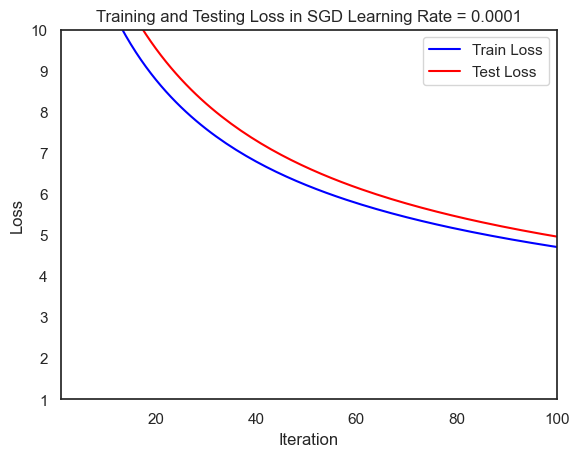

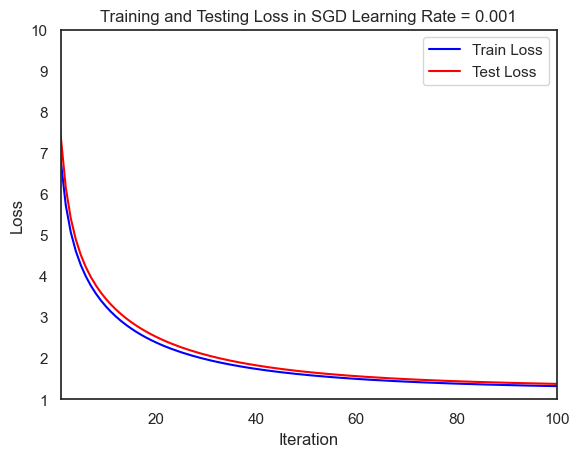

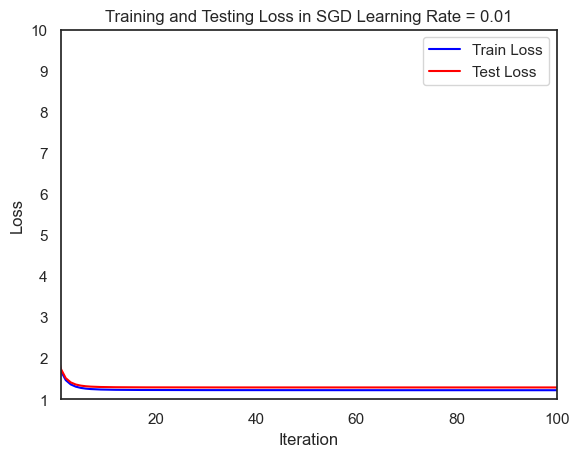

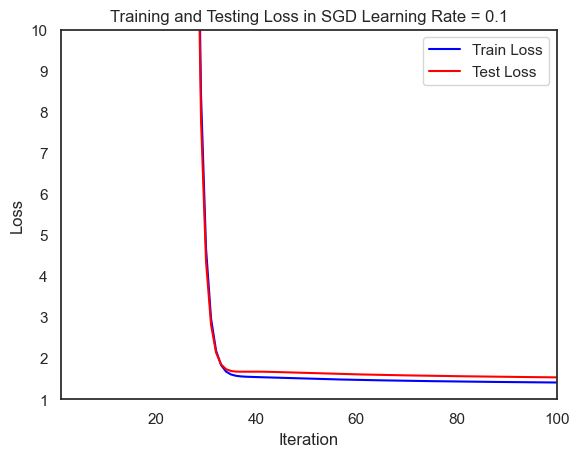

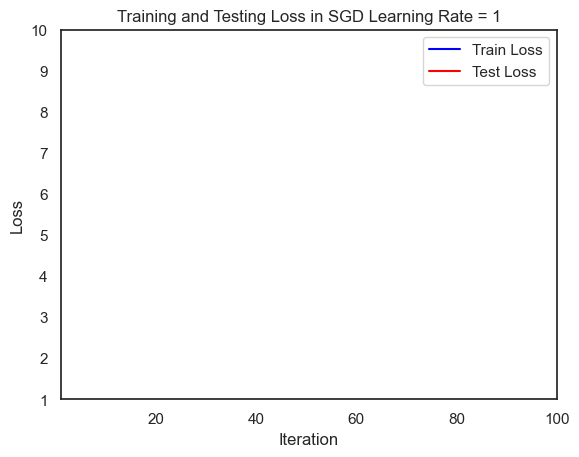

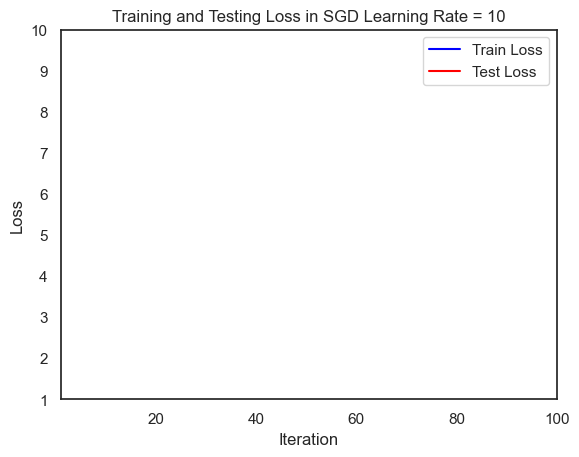

In [26]:
#SGD for Polynomial regression
#Define the SGDRegressor model
#Changing Learning Rate Values
sgd_eta = [0.0001, 0.001, 0.01, 0.1]

X = df.drop(columns=['Life Ladder', 'Negative affect', 'Generosity', 'Perceptions of corruption'])
Y = df['Life Ladder']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

for a in sgd_al:
    # Define the SGDRegressor model
    sgd = SGDRegressor(alpha=0.001, max_iter=1000, random_state=42, eta0 = a)

    # Initialize lists to record training and testing loss

    train_losses = []
    test_losses = []

    # Training loop
    for i in range(sgd.max_iter):

        # Fit the model with one iteration of SGD
        sgd.partial_fit(X_train_poly, y_train)


        # Calculate training loss
        y_train_pred = sgd.predict(X_train_poly)
        train_loss = mean_squared_error(y_train, y_train_pred)
        train_losses.append(train_loss)

        # Calculate testing loss
        y_test_pred = sgd.predict(X_test_poly)
        test_loss = mean_squared_error(y_test, y_test_pred)
        test_losses.append(test_loss)

    # Plot the training and testing loss over iterations
    plt.plot(train_losses, label='Train Loss', color='blue')
    plt.plot(test_losses, label='Test Loss', color='red')
    plt.xlim(1,100)
    plt.ylim(1,10)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Training and Testing Loss in SGD Learning Rate = {sgd.eta0}')
    plt.show()

In [27]:
#Ridge regression for Polynomial using cross validation
#Using the linear CV model

from sklearn.linear_model import RidgeCV

#Lasso Cross validation

cv = [0.0001, 0.001,0.01, 0.1, 1, 10]

#Fitting Ridge model for different penalty values
for i in cv:
    print(f"\nRidgeCV Model (alpha = {i})............................................\n")
    ridge_cv = RidgeCV(alphas = [i], cv = 4).fit(X_train_poly, y_train)
    #score
    print("The train score for ridge model is {}".format(ridge_cv.score(X_train_poly, y_train)))
    print("The train score for ridge model is {}".format(ridge_cv.score(X_test_poly, y_test)))


RidgeCV Model (alpha = 0.0001)............................................

The train score for ridge model is 0.017374509003641014
The train score for ridge model is -0.009822667646249617

RidgeCV Model (alpha = 0.001)............................................

The train score for ridge model is 0.017374509003417637
The train score for ridge model is -0.009822601720030244

RidgeCV Model (alpha = 0.01)............................................

The train score for ridge model is 0.017374508981071624
The train score for ridge model is -0.00982194251012869

RidgeCV Model (alpha = 0.1)............................................

The train score for ridge model is 0.017374506749364693
The train score for ridge model is -0.00981535563380631

RidgeCV Model (alpha = 1)............................................

The train score for ridge model is 0.017374286427739527
The train score for ridge model is -0.009750002877010333

RidgeCV Model (alpha = 10)....................................

In [28]:
#Lasso regression for Polynomial using cross validation
#Using the Lasso Cross Validation model

cv = [0.0001, 0.001,0.01, 0.1, 1, 10]

#Fitting Lasso model for different penalty values
for i in cv:
    print(f"\nLassoCV Model (alpha = {i})............................................\n")
    lasso_cv = LassoCV(alphas = [i], random_state=0, cv = 4).fit(X_train_poly, y_train)
    #score
    print("The train score for lasso model is {}".format(lasso_cv.score(X_train_poly, y_train)))
    print("The train score for lasso model is {}".format(lasso_cv.score(X_test_poly, y_test)))


LassoCV Model (alpha = 0.0001)............................................

The train score for lasso model is 0.017372792341542764
The train score for lasso model is -0.00963536149044919

LassoCV Model (alpha = 0.001)............................................

The train score for lasso model is 0.017256539899085155
The train score for lasso model is -0.008367063540101194

LassoCV Model (alpha = 0.01)............................................

The train score for lasso model is 0.013915195009759573
The train score for lasso model is -0.0014651744666309696

LassoCV Model (alpha = 0.1)............................................

The train score for lasso model is 0.000574737636989453
The train score for lasso model is 0.0003825422201719775

LassoCV Model (alpha = 1)............................................

The train score for lasso model is 0.0
The train score for lasso model is -0.0001348871569470944

LassoCV Model (alpha = 10)............................................

The 

In [29]:
#Elastic Net regression for Polynomial using cross validation
from sklearn.linear_model import ElasticNet

#Elastic Net Cross validation
cv = [0.0001, 0.001,0.01, 0.1, 1, 10]

#Fitting Elactic Net with different penalty values
for i in cv:
    print(f"\nElasticCV Model (alpha = {i})............................................\n")
    elastic_cv = ElasticNet(alpha = i).fit(X_train_poly, y_train)
    #score
    print("The train score for lasso model is {}".format(elastic_cv.score(X_train_poly, y_train)))
    print("The train score for lasso model is {}".format(elastic_cv.score(X_test_poly, y_test)))


ElasticCV Model (alpha = 0.0001)............................................

The train score for lasso model is 0.017374038262369385
The train score for lasso model is -0.009722959853980528

ElasticCV Model (alpha = 0.001)............................................

The train score for lasso model is 0.017334316918307113
The train score for lasso model is -0.008975384166727052

ElasticCV Model (alpha = 0.01)............................................

The train score for lasso model is 0.015844345269528715
The train score for lasso model is -0.005007099004472604

ElasticCV Model (alpha = 0.1)............................................

The train score for lasso model is 0.0049222390238378155
The train score for lasso model is 0.003663923482665421

ElasticCV Model (alpha = 1)............................................

The train score for lasso model is 0.0
The train score for lasso model is -0.0001348871569470944

ElasticCV Model (alpha = 10)......................................

<H1>G] Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance.</H1>

Mean Squared Error: 1.278757617612887
Root mean Squared value is: 1.1308216559709523
R2 Score: -0.009822674971443623


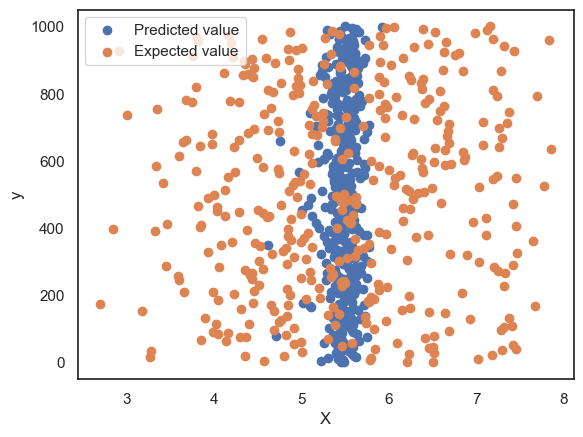

In [30]:
import math
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Life Ladder', 'Negative affect', 'Generosity','Perceptions of corruption'])
Y = df['Life Ladder'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 100)

# # Create a StandardScaler object and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X.head()

# # Create polynomial features

poly = PolynomialFeatures(degree = 2, include_bias=False)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)


# # Initialize and train a linear regression model

model = LinearRegression()
model.fit(X_train_poly, y_train)

# # Make predictions on the test data

y_pred = model.predict(X_test_poly)

# # Calculate and print the Mean Squared Error (MSE)

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root mean Squared value is: {math.sqrt(mse)}")

# from sklearn.metrics import r2_score
# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# Print the R2 score
print(f"R2 Score: {r2}")

# Plotting the original data and the polynomial regression curve
X_plot = np.linspace(0, 1000, 390).reshape(-1, 1)
plt.scatter(y_pred, X_plot, label='Predicted value')
plt.scatter(y_test, X_plot, label='Expected value')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

<H2>Ploynomial Model is a better model for the given dataset, as it has a higher R2 Score of 0.80 & a lower Mean Square Error of 0.23, compare to the Linear Model.</H2>

<H1>Future Work</H1>
<H3> 
- In order to improve the model we can consider including attibutes like - Access to Healthcare, Per Capita Income, Education, etc.
- Collecting additional data will help to train models better, so as to make better predictions.<br>
- In summary, the choice of hyperparameters, such as alpha (penalty term) and learning rate, had a significant impact on model performance across different regression techniques. Hyperparameter tuning is crucial for optimizing model performance for specific datasets.<br>
- Additionally, it's important to consider both training and test scores to evaluate how well models generalize to unseen data, and regularization techniques like Ridge, Lasso, and Elastic Net help combat overfitting by adding penalty terms to the loss function.</H3>